In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

In [40]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [41]:
print(df.duplicated().sum())

1390


In [42]:
new_df = df.drop_duplicates(ignore_index=False)

In [43]:
print(new_df.duplicated().sum())

0


In [44]:
new_df = new_df.loc[(new_df['Investigation.Type'] == 'Accident') 
                   & (new_df['Country'] == 'United States')
                    & (new_df['Event.Date'] > '2001-11-01')
                    & (new_df['Aircraft.Category'] == 'Airplane')
                    & ((new_df['Purpose.of.flight'] == 'Personal')
                    | (new_df['Purpose.of.flight'] == 'Business')
                       | (new_df['Purpose.of.flight'] == 'Other work use')
                       | (new_df['Purpose.of.flight'] == 'Public Aircraft')
                       | (new_df['Purpose.of.flight'] == 'Executive/corporate')
                       | (new_df['Purpose.of.flight'] == 'Public Aircraft - Federal')
                       | (new_df['Purpose.of.flight'] == 'Public Aircraft - Local')
                       | (new_df['Purpose.of.flight'] == 'Public Aircraft - State'))
                   ]

In [45]:
new_df = new_df.dropna(subset=['Make'])

In [46]:
new_df['Make'] = new_df['Make'].str.title()

In [48]:
new_df['Make'].value_counts()

Cessna                        4211
Piper                         2641
Beech                          974
Mooney                         300
Maule                          193
                              ... 
Diven Robert                     1
Stevens R P/Mccright D W         1
Bunker                           1
Daryl Baker                      1
Aero Vodochody Aero. Works       1
Name: Make, Length: 2919, dtype: int64

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 51768 to 90345
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                14577 non-null  object 
 1   Investigation.Type      14577 non-null  object 
 2   Accident.Number         14577 non-null  object 
 3   Event.Date              14577 non-null  object 
 4   Location                14577 non-null  object 
 5   Country                 14577 non-null  object 
 6   Latitude                14562 non-null  object 
 7   Longitude               14554 non-null  object 
 8   Airport.Code            10686 non-null  object 
 9   Airport.Name            10687 non-null  object 
 10  Injury.Severity         14572 non-null  object 
 11  Aircraft.damage         14545 non-null  object 
 12  Aircraft.Category       14577 non-null  object 
 13  Registration.Number     14577 non-null  object 
 14  Make                    14577 non-

In [50]:
new_df['Total.Fatal.Injuries'] = new_df['Total.Fatal.Injuries'].fillna(value=0)
new_df['Total.Serious.Injuries'] = new_df['Total.Serious.Injuries'].fillna(value=0)
new_df['Total.Minor.Injuries'] = new_df['Total.Minor.Injuries'].fillna(value=0)

In [51]:
new_df['Total.Injuries'] = new_df['Total.Fatal.Injuries'] + new_df['Total.Serious.Injuries'] + new_df['Total.Minor.Injuries']

In [16]:
new_df.head(30)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
51768,20011119X02259,Accident,FTW02FA036,2001-11-12,"Graham, TX",United States,33.256667,-98.447222,E15,Graham Municipal,Fatal(4),Destroyed,Airplane,N6134A,Piper,PA-31T1,No,2.0,Turbo Prop,Part 91: General Aviation,NaN,Executive/corporate,NaN,4.0,0.0,0.0,NaN,IMC,Approach,Probable Cause,24-09-2014,4.0
51955,20020110X00057,Accident,IAD02FA024,2001-12-30,"MILFORD, CT",United States,41.182223,-73.026945,BDR,Igor I. Sikorsky Airport,Fatal(1),Substantial,Airplane,N7427J,Piper,PA-28R-180,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,NaN,VMC,Approach,Probable Cause,05-06-2013,1.0
51987,20020114X00065,Accident,FTW02LA066,2002-01-10,"ALBUQUERQUE, NM",United States,NaN,NaN,AEG,DOUBLE EAGLE II,Non-Fatal,Substantial,Airplane,N87WW,Piper,PA-46T,No,1.0,Turbo Prop,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,IMC,Approach,Probable Cause,02-02-2009,0.0
52013,20020123X00101,Accident,FTW02LA067,2002-01-15,"IRAAN, TX",United States,30.905556,-101.891944,2F0,Iraan Municipal Airport,Non-Fatal,Substantial,Airplane,N509R,Cessna,172,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-02-2016,0.0
52361,20020415X00514,Accident,IAD02LA040,2002-04-03,"MOUNT HOLLY, NJ",United States,39.942777,-74.845555,VAY,SOUTH JERSEY RGNL,Non-Fatal,Substantial,Airplane,N5079J,Cessna,T310R,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,1.0,1.0,NaN,VMC,Go-around,Probable Cause,11-02-2015,2.0
52687,20020607X00829,Accident,FTW02LA168,2002-05-31,"CONWAY, AR",United States,35.080556,-92.424723,M03,Dennis Cantrell Field,Non-Fatal,Substantial,Airplane,N94769,Ercoupe,ERCO-415-E,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,21-06-2011,0.0
52708,20020604X00801,Accident,CHI02LA147,2002-06-02,"GOODLAND, KS",United States,NaN,NaN,GLD,RENNER FLD /GOODLAND MUNICIPAL,Non-Fatal,Substantial,Airplane,NC662Y,Waco,ASO,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,02-07-2009,0.0
52932,20020719X01174,Accident,CHI02CA196,2002-06-30,"JACKSONVILLE, IL",United States,39.774723,-90.238333,IJX,Jacksonville Muni,Non-Fatal,Substantial,Airplane,N1419,Grenier,Acro Sport,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,09-09-2002,0.0
52974,20020716X01137,Accident,CHI02CA182,2002-07-04,"MONROE, MI",United States,41.94,-83.434722,TTF,CUSTER,Non-Fatal,Substantial,Airplane,N3545R,Beech,A-23-23,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,13-05-2003,0.0
53002,20020715X01130,Accident,CHI02CA184,2002-07-07,"LOWELL, MI",United States,42.953889,-85.343889,24C,Lowell City,Non-Fatal,Substantial,Airplane,N52WP,Piper,PA-34,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,30-12-2003,0.0


In [52]:
sum(new_df['Model'].isna())

1

In [53]:
new_df = new_df.dropna(subset=['Model'])

In [33]:
##Karina complete this cell 
new_df = new_df.drop('Injury.Severity', axis =1, inplace = True)

In [ ]:
## Karina: make a visual (bar graph?) on # of engines vs # of accidents 

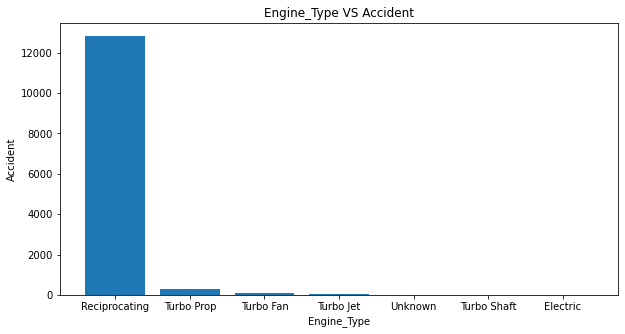

In [63]:
## Ermiyas: make a visual type of engine vs # of accidents
fig, ax = plt.subplots(figsize=(10,5))
x = new_df['Engine.Type'].value_counts().index
y = new_df['Engine.Type'].value_counts().values
ax.bar(x,y)
ax.set_title('Engine_Type VS Accident')
ax.set_xlabel('Engine_Type')
ax.set_ylabel('Accident');
# avoid recprocating engine type

In [ ]:
## Sangwon: make a visual for broad phase of flights vs # of accidents

In [79]:
## Ermiyas: use groupby for make/model and # of accidents using 'Total.Injuries' and value sort
new_df.loc[(new_df['Number.of.Engines'] > 1.0)
           & (new_df['Engine.Type'] != 'Reciprocating')
          & (new_df['Make'] =='Boeing')]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
70018,20110519X02343,Accident,DCA11PA075,2011-05-19,"Point Mugu, CA",United States,034622N,0119751W,KNTD,Naval Base Ventura County,Non-Fatal,Substantial,Airplane,N707AR,Boeing,707-321B,No,4.0,Turbo Fan,PUBU,NaN,Public Aircraft,"Omega Aerial Refueling Services, Inc.",0.0,3.0,0.0,0.0,VMC,NaN,"the failure of a midspar fitting, which was su...",25-09-2020,3.0


In [80]:
## Sangwon: use groupby for make/model based on aircraft damage category
new_df.loc[(new_df['Number.of.Engines'] > 1.0)
          & (new_df['Make'] =='Boeing')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
70018,20110519X02343,Accident,DCA11PA075,2011-05-19,"Point Mugu, CA",United States,034622N,0119751W,KNTD,Naval Base Ventura County,Non-Fatal,Substantial,Airplane,N707AR,Boeing,707-321B,No,4.0,Turbo Fan,PUBU,NaN,Public Aircraft,"Omega Aerial Refueling Services, Inc.",0.0,3.0,0.0,0.0,VMC,NaN,"the failure of a midspar fitting, which was su...",25-09-2020,3.0
